In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
dataset = pd.read_csv("../data/international-airline-passengers.csv", sep=',')
dataset.columns = ['month', 'passengers']
dataset = dataset.dropna()
dataset.head()

,month,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [182]:
dataset = dataset[['passengers']]

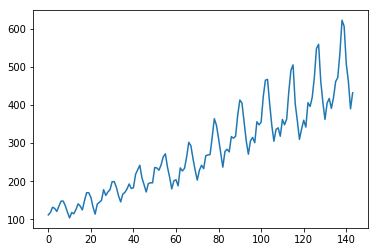

In [183]:
plt.plot(dataset)

In [184]:
dataset = dataset.values
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))

In [185]:
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [217]:
data_X, data_Y = create_dataset(dataset)

In [218]:
train_size = int(len(data_X) * 0.9)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [219]:
import torch

train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.tensor(train_X).float()
train_y = torch.tensor(train_Y).float()
test_x = torch.tensor(test_X).float()

In [220]:
from torch import nn
from torch.autograd import Variable

In [221]:
class lstm_reg(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(lstm_reg, self).__init__()
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # rnn
        self.reg = nn.Linear(hidden_size, output_size) # 回归
        
    def forward(self, x):
        x, _ = self.rnn(x) # (seq, batch, hidden)
        s, b, h = x.shape
        x = x.view(s*b, h) # 转换成线性层的输入格式
        x = self.reg(x)
        x = x.view(s, b, -1)
        return x

In [222]:
net = lstm_reg(2, 4)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

In [223]:
for e in range(1000):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    out = net(var_x)
    loss = criterion(out, var_y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #if (e + 1) % 100 == 0: # 每 100 次输出结果
    print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.item()))

Epoch: 1, Loss: 0.32160
Epoch: 2, Loss: 0.28706
Epoch: 3, Loss: 0.25388
Epoch: 4, Loss: 0.22216
Epoch: 5, Loss: 0.19205
Epoch: 6, Loss: 0.16371
Epoch: 7, Loss: 0.13735
Epoch: 8, Loss: 0.11323
Epoch: 9, Loss: 0.09167
Epoch: 10, Loss: 0.07306
Epoch: 11, Loss: 0.05779
Epoch: 12, Loss: 0.04628
Epoch: 13, Loss: 0.03890
Epoch: 14, Loss: 0.03582
Epoch: 15, Loss: 0.03684
Epoch: 16, Loss: 0.04100
Epoch: 17, Loss: 0.04652
Epoch: 18, Loss: 0.05140
Epoch: 19, Loss: 0.05432
Epoch: 20, Loss: 0.05492
Epoch: 21, Loss: 0.05355
Epoch: 22, Loss: 0.05086
Epoch: 23, Loss: 0.04755
Epoch: 24, Loss: 0.04418
Epoch: 25, Loss: 0.04119
Epoch: 26, Loss: 0.03880
Epoch: 27, Loss: 0.03712
Epoch: 28, Loss: 0.03612
Epoch: 29, Loss: 0.03571
Epoch: 30, Loss: 0.03576
Epoch: 31, Loss: 0.03612
Epoch: 32, Loss: 0.03664
Epoch: 33, Loss: 0.03719
Epoch: 34, Loss: 0.03767
Epoch: 35, Loss: 0.03801
Epoch: 36, Loss: 0.03817
Epoch: 37, Loss: 0.03812
Epoch: 38, Loss: 0.03789
Epoch: 39, Loss: 0.03749
Epoch: 40, Loss: 0.03698
Epoch: 41

Epoch: 321, Loss: 0.00352
Epoch: 322, Loss: 0.00352
Epoch: 323, Loss: 0.00350
Epoch: 324, Loss: 0.00348
Epoch: 325, Loss: 0.00345
Epoch: 326, Loss: 0.00343
Epoch: 327, Loss: 0.00341
Epoch: 328, Loss: 0.00340
Epoch: 329, Loss: 0.00338
Epoch: 330, Loss: 0.00336
Epoch: 331, Loss: 0.00334
Epoch: 332, Loss: 0.00333
Epoch: 333, Loss: 0.00332
Epoch: 334, Loss: 0.00330
Epoch: 335, Loss: 0.00328
Epoch: 336, Loss: 0.00326
Epoch: 337, Loss: 0.00325
Epoch: 338, Loss: 0.00323
Epoch: 339, Loss: 0.00322
Epoch: 340, Loss: 0.00320
Epoch: 341, Loss: 0.00319
Epoch: 342, Loss: 0.00317
Epoch: 343, Loss: 0.00316
Epoch: 344, Loss: 0.00314
Epoch: 345, Loss: 0.00313
Epoch: 346, Loss: 0.00311
Epoch: 347, Loss: 0.00310
Epoch: 348, Loss: 0.00309
Epoch: 349, Loss: 0.00307
Epoch: 350, Loss: 0.00306
Epoch: 351, Loss: 0.00305
Epoch: 352, Loss: 0.00303
Epoch: 353, Loss: 0.00302
Epoch: 354, Loss: 0.00301
Epoch: 355, Loss: 0.00299
Epoch: 356, Loss: 0.00298
Epoch: 357, Loss: 0.00297
Epoch: 358, Loss: 0.00296
Epoch: 359, 

Epoch: 637, Loss: 0.00131
Epoch: 638, Loss: 0.00130
Epoch: 639, Loss: 0.00129
Epoch: 640, Loss: 0.00129
Epoch: 641, Loss: 0.00128
Epoch: 642, Loss: 0.00128
Epoch: 643, Loss: 0.00127
Epoch: 644, Loss: 0.00127
Epoch: 645, Loss: 0.00126
Epoch: 646, Loss: 0.00126
Epoch: 647, Loss: 0.00125
Epoch: 648, Loss: 0.00125
Epoch: 649, Loss: 0.00124
Epoch: 650, Loss: 0.00123
Epoch: 651, Loss: 0.00123
Epoch: 652, Loss: 0.00122
Epoch: 653, Loss: 0.00122
Epoch: 654, Loss: 0.00121
Epoch: 655, Loss: 0.00121
Epoch: 656, Loss: 0.00120
Epoch: 657, Loss: 0.00120
Epoch: 658, Loss: 0.00119
Epoch: 659, Loss: 0.00119
Epoch: 660, Loss: 0.00118
Epoch: 661, Loss: 0.00118
Epoch: 662, Loss: 0.00117
Epoch: 663, Loss: 0.00117
Epoch: 664, Loss: 0.00116
Epoch: 665, Loss: 0.00116
Epoch: 666, Loss: 0.00115
Epoch: 667, Loss: 0.00115
Epoch: 668, Loss: 0.00114
Epoch: 669, Loss: 0.00114
Epoch: 670, Loss: 0.00113
Epoch: 671, Loss: 0.00113
Epoch: 672, Loss: 0.00112
Epoch: 673, Loss: 0.00112
Epoch: 674, Loss: 0.00111
Epoch: 675, 

Epoch: 953, Loss: 0.00072
Epoch: 954, Loss: 0.00072
Epoch: 955, Loss: 0.00072
Epoch: 956, Loss: 0.00072
Epoch: 957, Loss: 0.00072
Epoch: 958, Loss: 0.00072
Epoch: 959, Loss: 0.00072
Epoch: 960, Loss: 0.00072
Epoch: 961, Loss: 0.00072
Epoch: 962, Loss: 0.00072
Epoch: 963, Loss: 0.00071
Epoch: 964, Loss: 0.00071
Epoch: 965, Loss: 0.00071
Epoch: 966, Loss: 0.00071
Epoch: 967, Loss: 0.00071
Epoch: 968, Loss: 0.00071
Epoch: 969, Loss: 0.00071
Epoch: 970, Loss: 0.00071
Epoch: 971, Loss: 0.00071
Epoch: 972, Loss: 0.00071
Epoch: 973, Loss: 0.00071
Epoch: 974, Loss: 0.00071
Epoch: 975, Loss: 0.00070
Epoch: 976, Loss: 0.00070
Epoch: 977, Loss: 0.00070
Epoch: 978, Loss: 0.00070
Epoch: 979, Loss: 0.00070
Epoch: 980, Loss: 0.00070
Epoch: 981, Loss: 0.00070
Epoch: 982, Loss: 0.00070
Epoch: 983, Loss: 0.00070
Epoch: 984, Loss: 0.00070
Epoch: 985, Loss: 0.00070
Epoch: 986, Loss: 0.00070
Epoch: 987, Loss: 0.00069
Epoch: 988, Loss: 0.00069
Epoch: 989, Loss: 0.00069
Epoch: 990, Loss: 0.00069
Epoch: 991, 

In [224]:
net = net.eval()

In [225]:
data_X = data_X.reshape(-1, 1, 2)
data_X = torch.tensor(data_X).float()
var_data = Variable(data_X)
pred_test = net(var_data)

In [226]:
pred_test = pred_test.view(-1).data.numpy()

In [227]:
pred_test

array([0.21565986, 0.26383373, 0.27607998, 0.26197883, 0.25622505,
       0.25430998, 0.24768147, 0.23842853, 0.23171815, 0.22898364,
       0.23718673, 0.24434939, 0.25823504, 0.28323117, 0.29743207,
       0.29188597, 0.30188164, 0.31021628, 0.2958428 , 0.27534464,
       0.25905278, 0.25379863, 0.2680907 , 0.28282806, 0.2965214 ,
       0.3252967 , 0.33870763, 0.35803744, 0.36622956, 0.37573352,
       0.3551633 , 0.32470188, 0.30522138, 0.30218554, 0.31948397,
       0.3365119 , 0.35200015, 0.37063205, 0.37932754, 0.3917648 ,
       0.4384964 , 0.44757676, 0.42680958, 0.36790356, 0.34445146,
       0.3449475 , 0.37052256, 0.3927243 , 0.40487292, 0.43102536,
       0.46073845, 0.4881342 , 0.5155311 , 0.5214847 , 0.48244715,
       0.41247183, 0.38475466, 0.38334084, 0.40801713, 0.42662093,
       0.42654318, 0.44216666, 0.45966506, 0.501293  , 0.5605463 ,
       0.58390594, 0.49452555, 0.4245357 , 0.40482733, 0.41898066,
       0.45806575, 0.48898932, 0.49753422, 0.5110759 , 0.53807

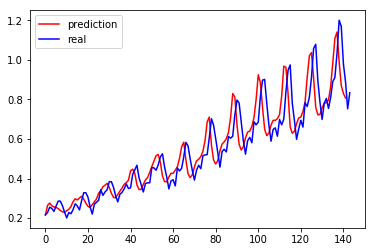

In [228]:
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')

In [ ]:
https://github.com/L1aoXingyu/code-of-learn-deep-learning-with-pytorch/blob/master/chapter5_RNN/time-series/lstm-time-series.ipynb